# <font color='saddlebrown'>Explanatory Data Analysis</font>

***
***

### <font color='saddlebrown'>Import packages</font>

In [15]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#for easy access to path
import os
import sys

#importing packages for data manuplation and visualization
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import Markdown, display, Image, display_html
from scipy.stats import skew

import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import Markdown, display, Image, display_html
from scipy.stats import skew


# Visualization df
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

sys.path.append(os.path.abspath(os.path.join('../data')))

In [11]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
df = pd.read_csv("../data/clean_data.csv")

In [22]:
import plots  as plot

In [4]:
# unique value counts
counts_df = df['diagnosis'].value_counts()
counts_df

B    357
M    212
Name: diagnosis, dtype: int64

> `357` were Benign while `212` were Malignan.


### <font color='saddlebrown'>Univariate Analysis</font>

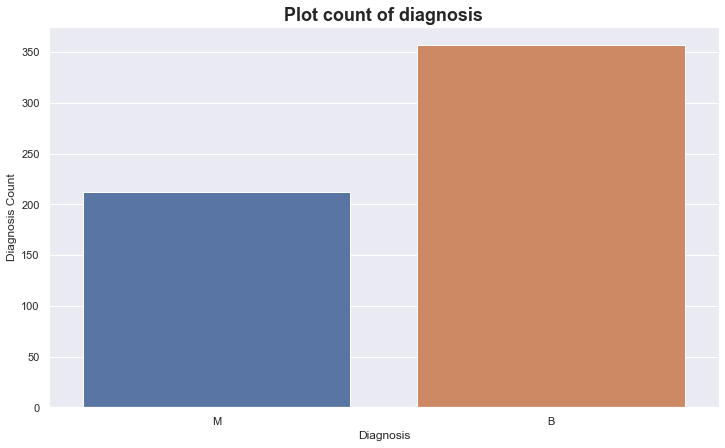

<Figure size 432x288 with 0 Axes>

In [42]:
plot.plot_count(df, 'diagnosis', "Diagnosis", "Diagnosis Count")
plt.savefig('../screenshots/DiagnosisCount.png')

### <font color='saddlebrown'>Bivariate Analysis</font>

In [ ]:
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]
fields = ["mean", "se", "worst"]
plot.boxplot(df,columns,fields)

In [39]:
y = df.diagnosis # M or B
x = df.drop(['id', 'diagnosis'], axis=1)

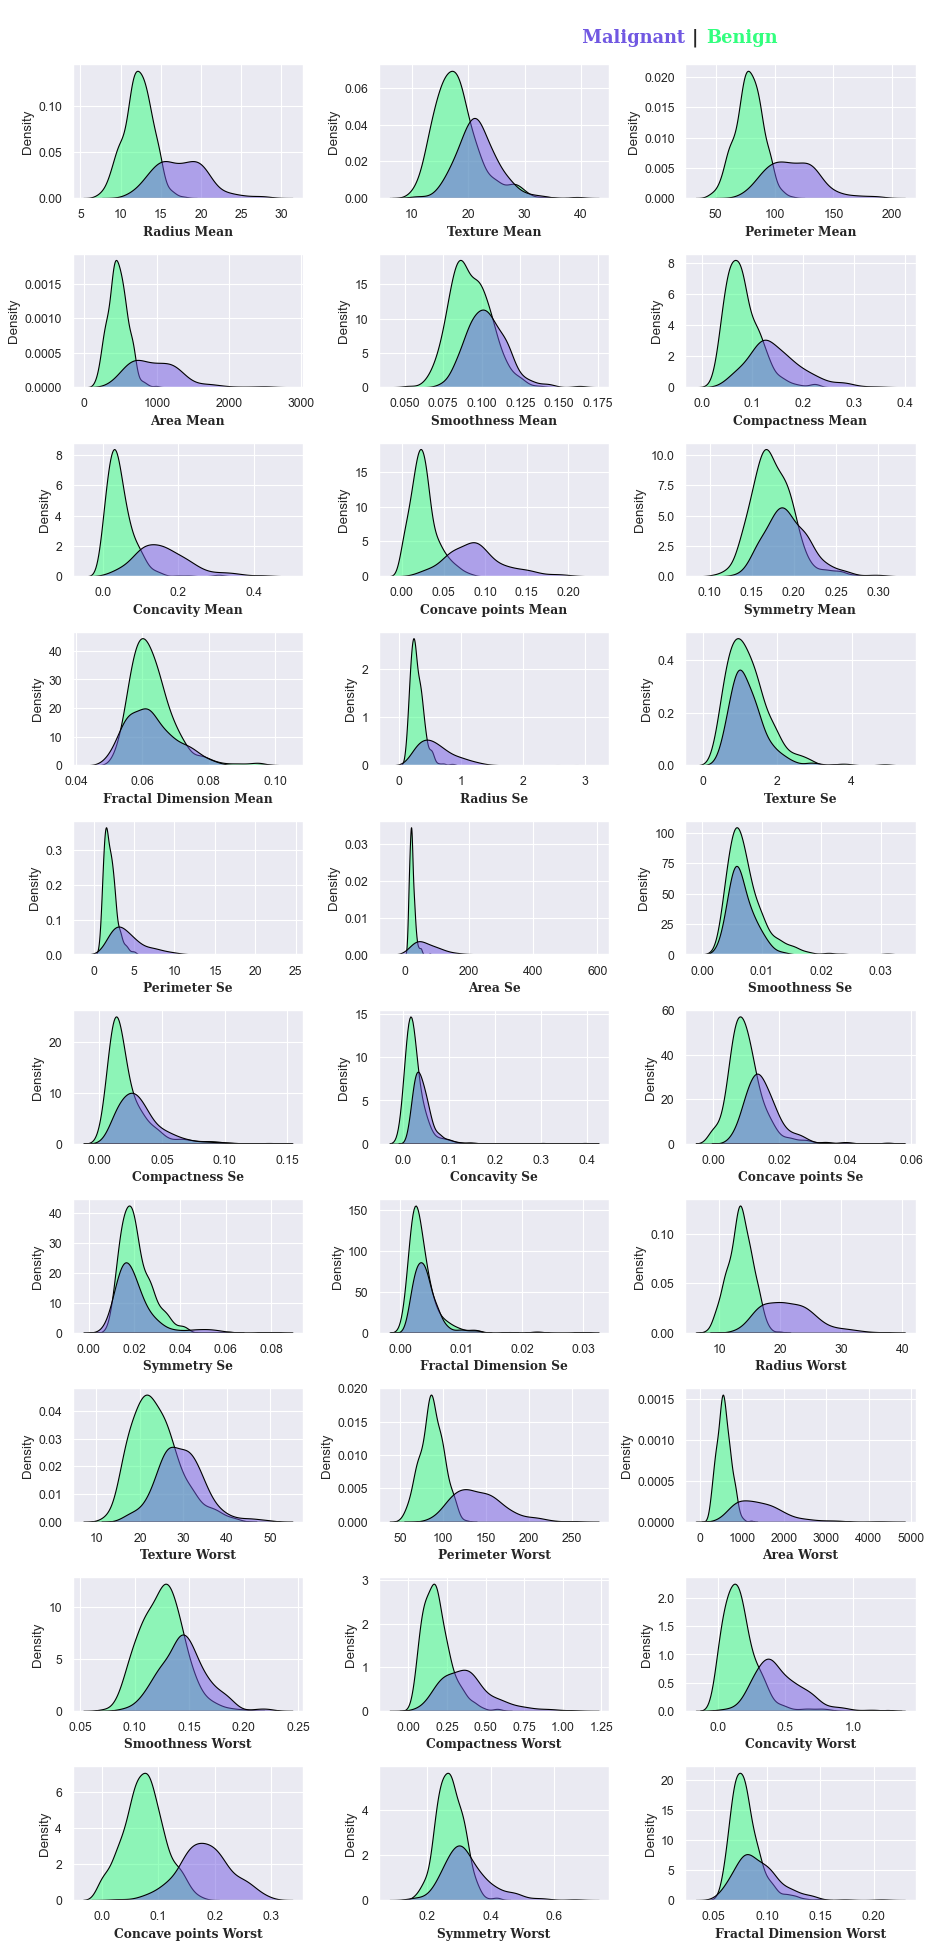

In [45]:
fig,ax = plt.subplots(nrows = 10, ncols = 3, figsize = (12,24),dpi=80)
axes = ax.ravel()

for col,ax in zip(x.columns,axes):
    # plots
    sns.kdeplot(df[col], ax = ax, shade = True ,
                palette=["#7158e2", "#32ff7e"],
                alpha = 0.5, linewidth = 1, ec = 'black',
                hue = df['diagnosis'], hue_order = ['M','B'],
                legend = False)

    # plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_') ])
    ax.axes.set_xlabel(xlabel,{'font':'serif','size':11, 'weight':'bold'}, alpha = 1)

plt.tight_layout(pad= 2,h_pad = 1, w_pad = 1)

fig.text(0.615,1, "\n Malignant",{'font':'serif','size':16, 'weight':'bold', 'color':"#7158e2"}, alpha = 1)
fig.text(0.735,1, '|',{'font':'serif','size':16, 'weight':'bold'})
fig.text(0.75,1, "Benign",{'font':'serif','size':16, 'weight':'bold','color':"#32ff7e"}, alpha = 1)

fig.show()

plt.savefig('../screenshots/Bivariet.png')

In [77]:
def hist_plot(df,features, fields):
    fig, axs = plt.subplots(10,3, figsize=(20,45))
    for col in range(len(features)):  
        for f in range(len(fields)):  
            sns.histplot(df, 
                        x=features[col]+"_"+fields[f], 
                        hue="diagnosis", element="bars", 
                        stat="count", 
                        palette=["dodgerblue", "limegreen"],
                        ax=axs[col][f])

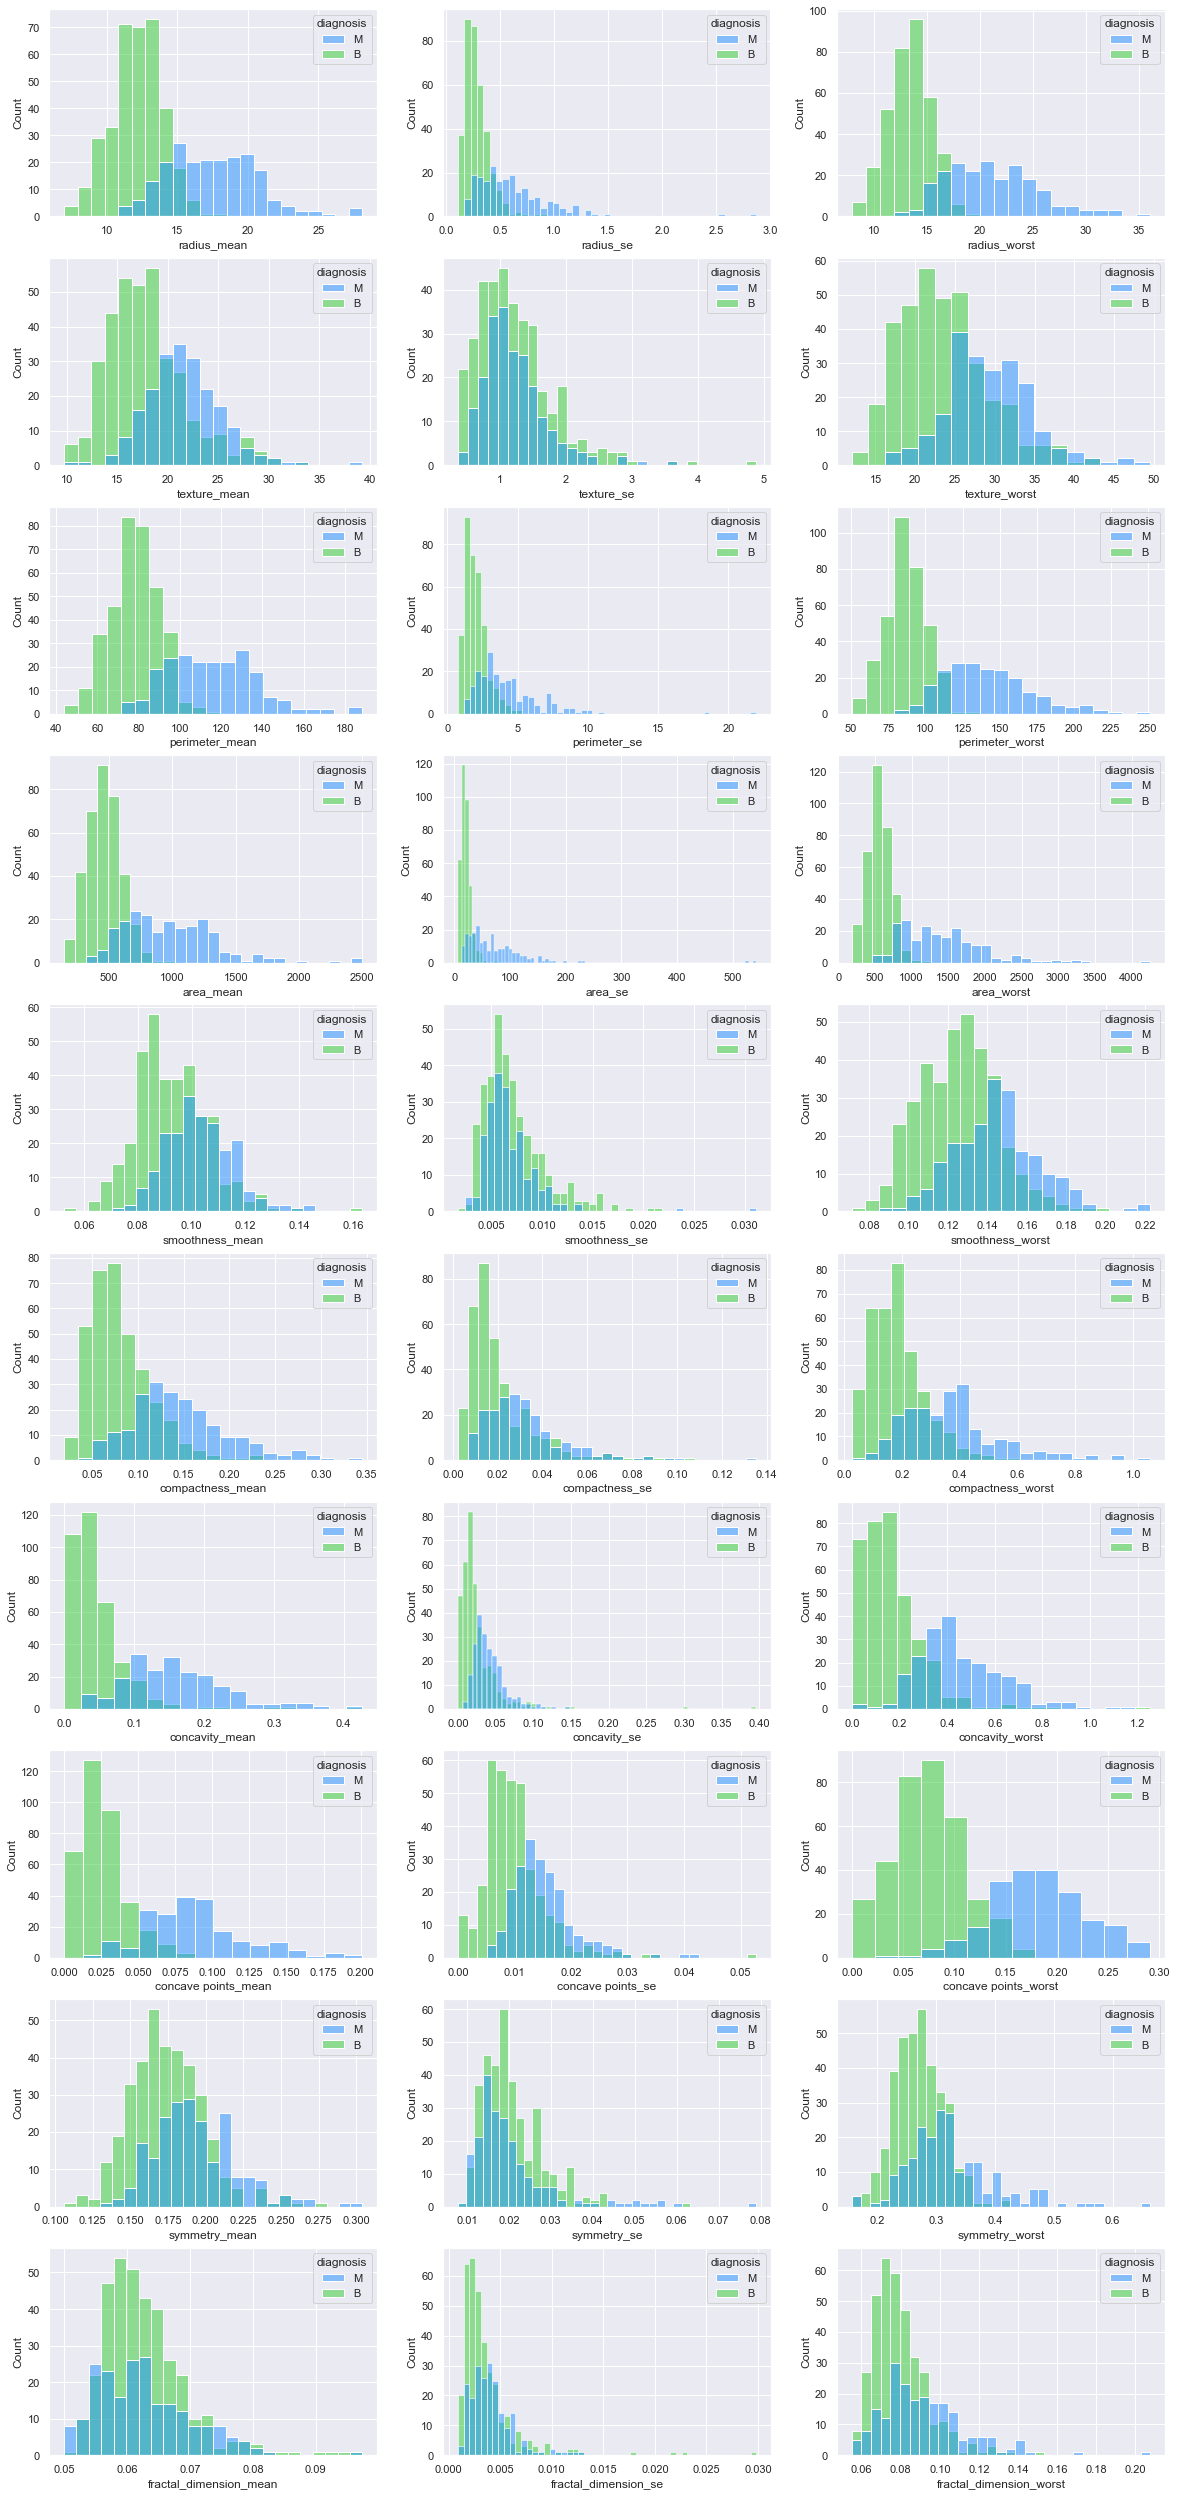

In [78]:
hist_plot(df,columns,fields)
plt.savefig('../screenshots/hist.png')